# this code is analysis of experiment using code built with positive control data
[I used simulation data for two systems. In both the Smad pathway is simulated identically, with random noise in parameters and protein expression. The differene in the two systems is that in system 1, [gene = f(Smad3/4)], target gene expression depends directly on nuclear Smad3/Smad4, and in system 2, [gene = f(Smad3/4 , X)] target gene expression depends on nuclear Smad3/Smad4 and a randomly varying other factor, X (which in this case is a factor that affects how strongly Smad3/4 induces gene expression.]

From the simulated data, I use full trajectories for the level nuclear Smad3--that is the concentration of all species of Smad3 in the nucleus, such as would be observed in a microscope. (Note, I am not using trajectories for Smad3/Smad4 complex, which is the actual molecular complex on which gene production depends. I do not use these trajectories because they are not measurable in cells). Second, I use full trajectories of target gene production. For gene expression I analyze either A) a gene whose production depends directly on Smad3/Smad4 binding, or B) a gene whose production depends on a small network motif (3-nodes total, I-FFL1 specifically) that causes production of gene to be proportional to the fold-change in Smad3/Smad4 complex.

For experimental""" analysis, I take trajectories of nuclear NG-Smad3, which were measured in single cells from experiments and I take trajectories of total nuclear Snail:mCherry (or median, see next experiment). I first run diffusion maps on the NG-Smad3 trajectories to obtain a good DMAP for NG-Smad3. Then I obtain a DMAP for Snail using the same method. Then I use Gaussian Process Regression to assess whether Snail dynamics (i.e. Snail DMAP) can be predicted using Smad3 dynamics (i.e. Snail DMAP). 

In order to obtain a good diffusion map, I prepare (process?) the original data in the following way.
1. First, I take raw data as is. This is matrix1. (Matrix1 is M cells X N timepoints)
2. Then I take the raw data and compute the derivative of each trajectory. This is matrix 2. 
3. Then I take the raw data and compute the integral of each trajectory. This is matrix 3. 
4. Then I combine matrices 1, 2 and 3 into one new matrix, MatrixCAT (MatrixCAT is M cells X 3*N timepoints)
5. Then I transform this data set (in a way the preserves the topology of the data set) by normalizing all trajectories at each time point using the following:
    MT = MatrixCAT[t,:] (t=1)
    [MT is an 1 x M array, where M is the number of cells]
    MTn = MT-min(MT)/(max(MT)-min(MT)
    MTns = sqrt(MTn)
    MatrixCATztos[t,:] = MTns
    [I do this for all timepoints]
6. This transformation preserves topology, and it ensures that the difussion distances are similar for each dimension, which is important for finding a good difussion kernel for the diffusion map algoritm. 
7. By including raw data, first derivative of data, and integral of data were are enableing the algorithm to find a difussion Map that uncovers the dynamical features of the data set. 





# below this is the one value you must change if you change how this code runs

In [1]:
#set parameters in analysis_parameters_func.py
import analysis_parameters_func
from analysis_parameters_func import *
import importlib
importlib.reload(analysis_parameters_func)

num_eps,eL,eH,evecs_cut,num_evecs,sampiter,subsampfactor,subsampmax,reducedimval,promval,specid = analysis_parameters() # analysis_parameters(uniqueid)
print(specid)

dall = runsToRun()
print(dall)


agnostic-AGI-zto_numeps50-1.5-4_rdimval50_n-evecs30cut-True_promval-0.01_SI-10_subsampF10_sampmax500
26  runs to perform
[('expSYST1_PC', 'SMAD-rsmad'), ('expSYST1_PC', 'SMAD-complex'), ('expSYST1_PC', 'GENE-iffl'), ('expSYST1_PC', 'GENE-caga'), ('expSYST1_PC', 'RFP-iffl'), ('expSYST1_PC', 'RFP-caga'), ('expSYST2_PC', 'GENE-iffl'), ('expSYST2_PC', 'GENE-caga'), ('expSYST2_PC', 'RFP-iffl'), ('expSYST2_PC', 'RFP-caga'), ('expSYST5_PC', 'GENE-iffl'), ('expSYST5_PC', 'GENE-caga'), ('expSYST5_PC', 'RFP-iffl'), ('expSYST5_PC', 'RFP-caga'), ('exp3', 'SMAD-median'), ('exp3', 'SMAD-total'), ('exp3', 'SNAIL-median'), ('exp3', 'SNAIL-total'), ('exp4', 'SMAD-median'), ('exp4', 'SMAD-total'), ('exp4', 'SNAIL-median'), ('exp4', 'SNAIL-total'), ('exp5', 'SMAD-median'), ('exp5', 'SMAD-total'), ('exp5', 'SNAIL-median'), ('exp5', 'SNAIL-total')]


/Users/frick/Dparams/DParamsFinal_v8
26  runs to perform
('expSYST1_PC', 'SMAD-rsmad')
epssearchexpSYST1_PC-SMAD-rsmadpickle
using ein
experiment with best accuracy =  epssearchexpSYST1_PC-SMAD-rsmadpickle
dimensionality with best accuracy =  [1 4 9]
best accuracy =  0.002081279486804649
epssearchexpSYST1_PC-SMAD-rsmadpickle


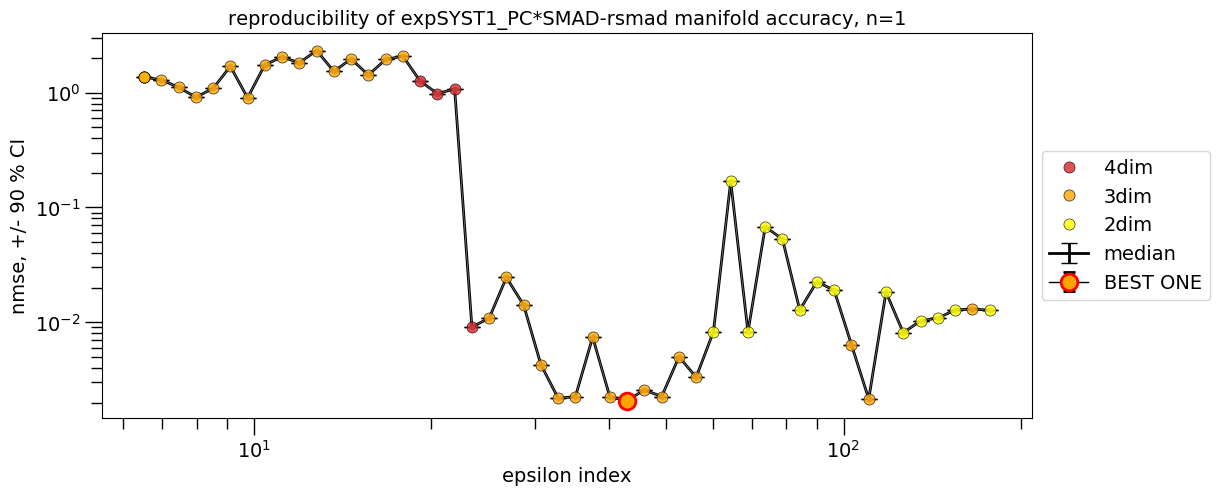

(500, 30)
(30,)
()
ev_in= [1 4 9]
epsilon error
(3,)

saving here... /Users/frick/Dparams/DParamsFinal_v8/agnostic-AGI-zto_numeps50-1dot5-4_rdimval50_n-evecs30cut-True_promval-0dot01_SI-10_subsampF10_sampmax500/csvfiles/

saving as...  expSYST1_PC-SMAD-rsmad -[identifier].csv
expSYST1_PC-SMAD-rsmad
('expSYST1_PC', 'SMAD-complex')
epssearchexpSYST1_PC-SMAD-complexpickle
using ein
experiment with best accuracy =  epssearchexpSYST1_PC-SMAD-complexpickle
dimensionality with best accuracy =  [1 3]
best accuracy =  0.0011891672630263003
epssearchexpSYST1_PC-SMAD-complexpickle


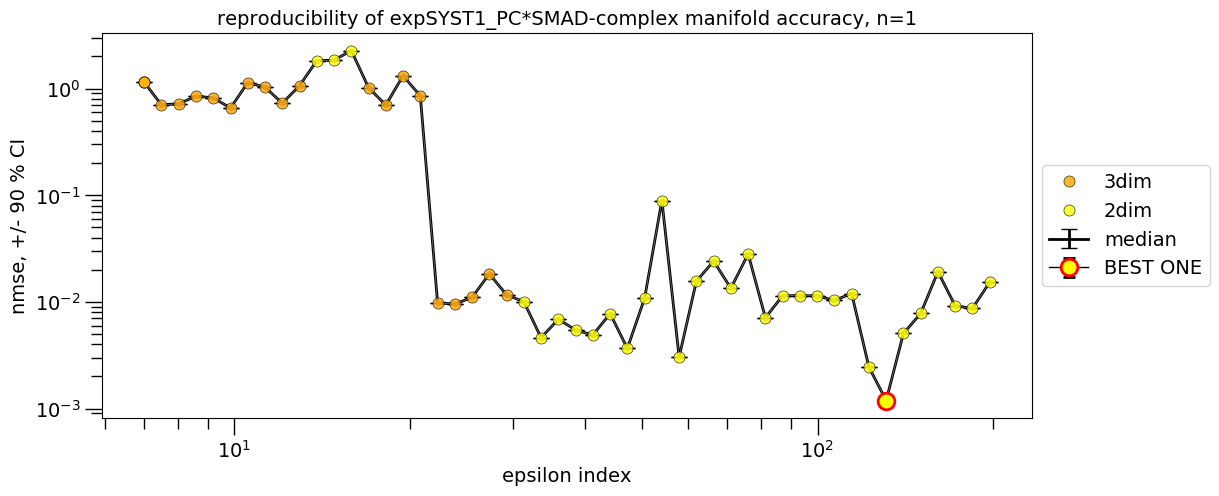

(500, 30)
(30,)
()
ev_in= [1 3]
epsilon error
(2,)

saving here... /Users/frick/Dparams/DParamsFinal_v8/agnostic-AGI-zto_numeps50-1dot5-4_rdimval50_n-evecs30cut-True_promval-0dot01_SI-10_subsampF10_sampmax500/csvfiles/

saving as...  expSYST1_PC-SMAD-complex -[identifier].csv
expSYST1_PC-SMAD-complex
('expSYST1_PC', 'GENE-iffl')
epssearchexpSYST1_PC-GENE-ifflpickle
using ein
experiment with best accuracy =  epssearchexpSYST1_PC-GENE-ifflpickle
dimensionality with best accuracy =  [ 1  4 10]
best accuracy =  0.0026908684877407106
epssearchexpSYST1_PC-GENE-ifflpickle


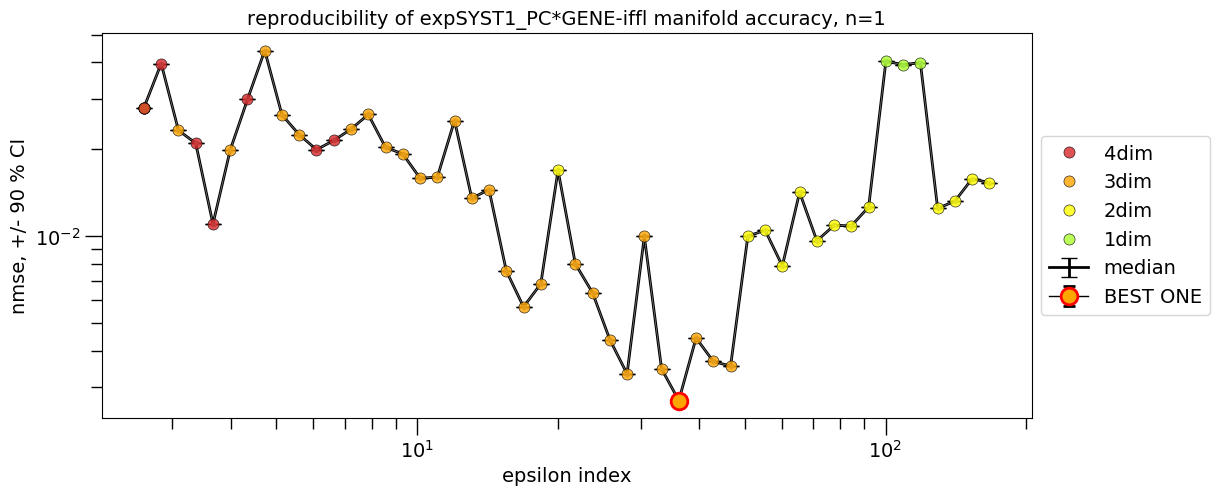

(500, 30)
(30,)
()
ev_in= [ 1  4 10]
epsilon error
(3,)

saving here... /Users/frick/Dparams/DParamsFinal_v8/agnostic-AGI-zto_numeps50-1dot5-4_rdimval50_n-evecs30cut-True_promval-0dot01_SI-10_subsampF10_sampmax500/csvfiles/

saving as...  expSYST1_PC-GENE-iffl -[identifier].csv
expSYST1_PC-GENE-iffl
('expSYST1_PC', 'GENE-caga')
epssearchexpSYST1_PC-GENE-cagapickle
using ein
experiment with best accuracy =  epssearchexpSYST1_PC-GENE-cagapickle
dimensionality with best accuracy =  [1 4]
best accuracy =  0.006344604434242018
epssearchexpSYST1_PC-GENE-cagapickle


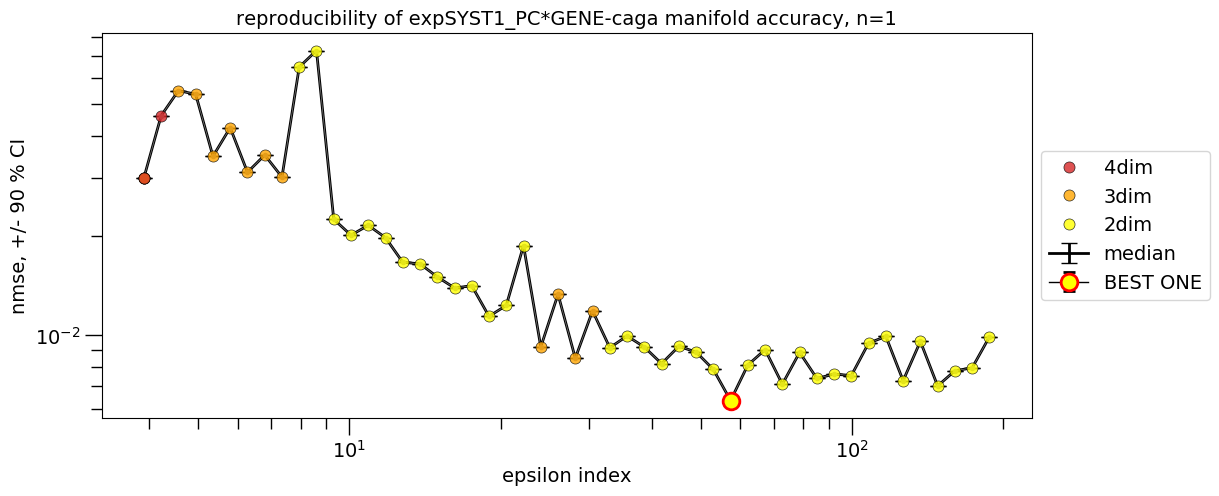

(500, 30)
(30,)
()
ev_in= [1 4]
epsilon error
(2,)

saving here... /Users/frick/Dparams/DParamsFinal_v8/agnostic-AGI-zto_numeps50-1dot5-4_rdimval50_n-evecs30cut-True_promval-0dot01_SI-10_subsampF10_sampmax500/csvfiles/

saving as...  expSYST1_PC-GENE-caga -[identifier].csv
expSYST1_PC-GENE-caga
('expSYST1_PC', 'RFP-iffl')
epssearchexpSYST1_PC-RFP-ifflpickle
using ein
experiment with best accuracy =  epssearchexpSYST1_PC-RFP-ifflpickle
dimensionality with best accuracy =  [ 1  4 10]
best accuracy =  0.0024847777518920643
epssearchexpSYST1_PC-RFP-ifflpickle


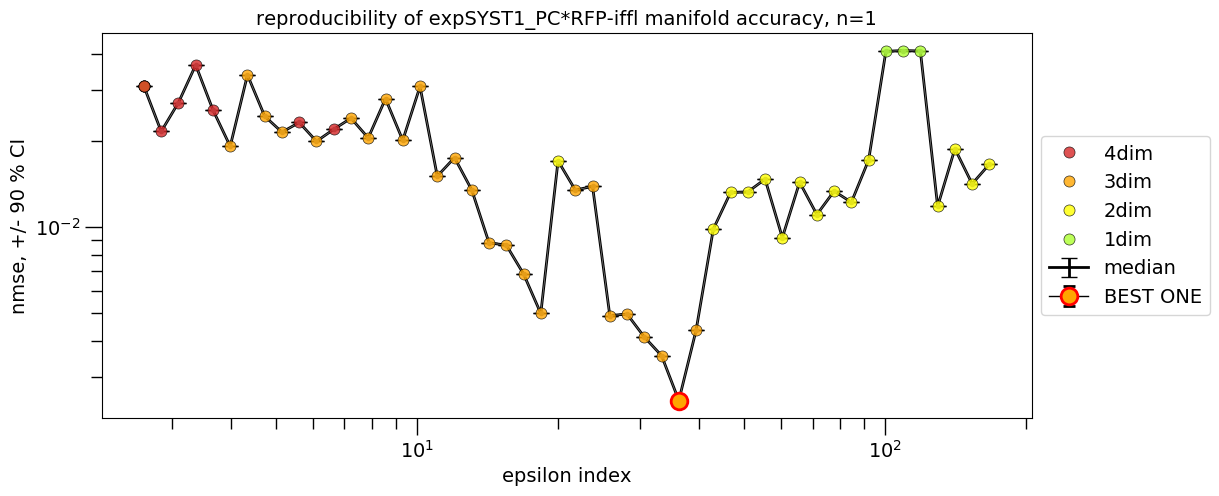

(500, 30)
(30,)
()
ev_in= [ 1  4 10]
epsilon error
(3,)

saving here... /Users/frick/Dparams/DParamsFinal_v8/agnostic-AGI-zto_numeps50-1dot5-4_rdimval50_n-evecs30cut-True_promval-0dot01_SI-10_subsampF10_sampmax500/csvfiles/

saving as...  expSYST1_PC-RFP-iffl -[identifier].csv
expSYST1_PC-RFP-iffl
('expSYST1_PC', 'RFP-caga')
epssearchexpSYST1_PC-RFP-cagapickle
using ein
experiment with best accuracy =  epssearchexpSYST1_PC-RFP-cagapickle
dimensionality with best accuracy =  [1 4 7]
best accuracy =  0.00284147928166151
epssearchexpSYST1_PC-RFP-cagapickle


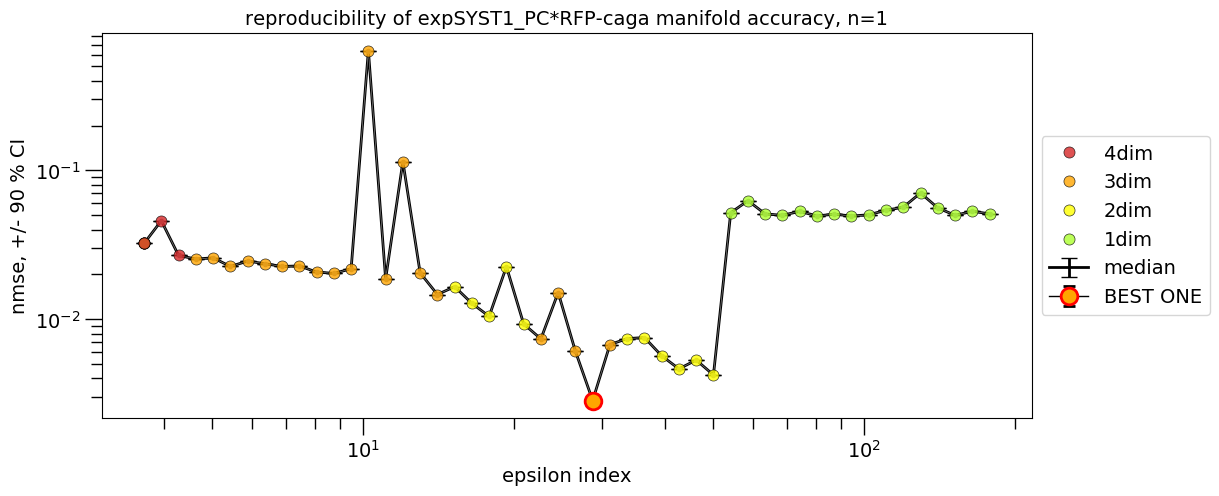

(500, 30)
(30,)
()
ev_in= [1 4 7]
epsilon error
(3,)

saving here... /Users/frick/Dparams/DParamsFinal_v8/agnostic-AGI-zto_numeps50-1dot5-4_rdimval50_n-evecs30cut-True_promval-0dot01_SI-10_subsampF10_sampmax500/csvfiles/

saving as...  expSYST1_PC-RFP-caga -[identifier].csv
expSYST1_PC-RFP-caga
('expSYST2_PC', 'GENE-iffl')
epssearchexpSYST2_PC-GENE-ifflpickle
using ein
experiment with best accuracy =  epssearchexpSYST2_PC-GENE-ifflpickle
dimensionality with best accuracy =  [1 3 6]
best accuracy =  0.012720107285936002
epssearchexpSYST2_PC-GENE-ifflpickle


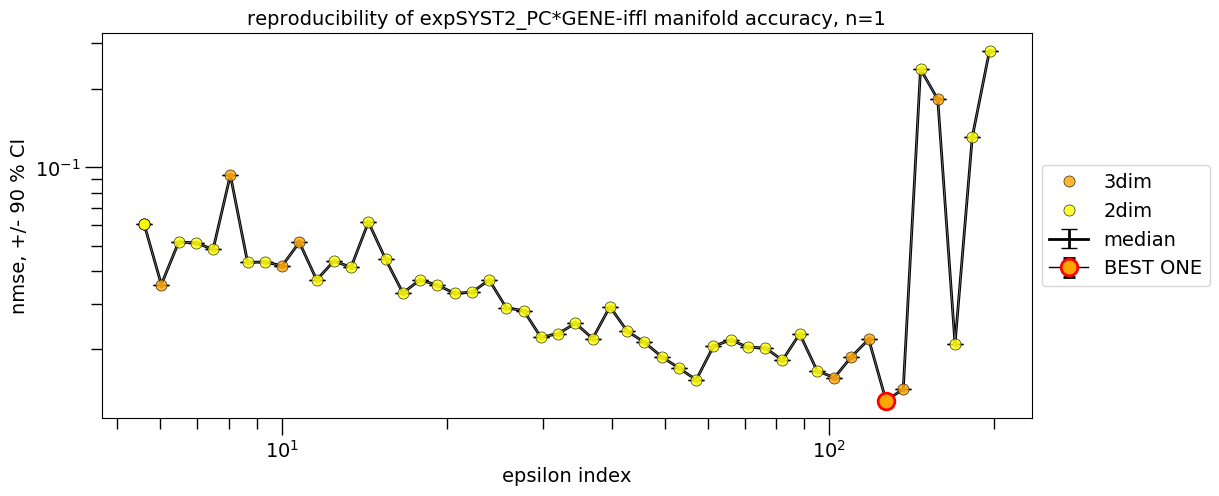

(500, 30)
(30,)
()
ev_in= [1 3 6]
epsilon error
(3,)

saving here... /Users/frick/Dparams/DParamsFinal_v8/agnostic-AGI-zto_numeps50-1dot5-4_rdimval50_n-evecs30cut-True_promval-0dot01_SI-10_subsampF10_sampmax500/csvfiles/

saving as...  expSYST2_PC-GENE-iffl -[identifier].csv
expSYST2_PC-GENE-iffl
('expSYST2_PC', 'GENE-caga')
epssearchexpSYST2_PC-GENE-cagapickle
using ein
experiment with best accuracy =  epssearchexpSYST2_PC-GENE-cagapickle
dimensionality with best accuracy =  [1 4]
best accuracy =  0.0044490093199067715
epssearchexpSYST2_PC-GENE-cagapickle


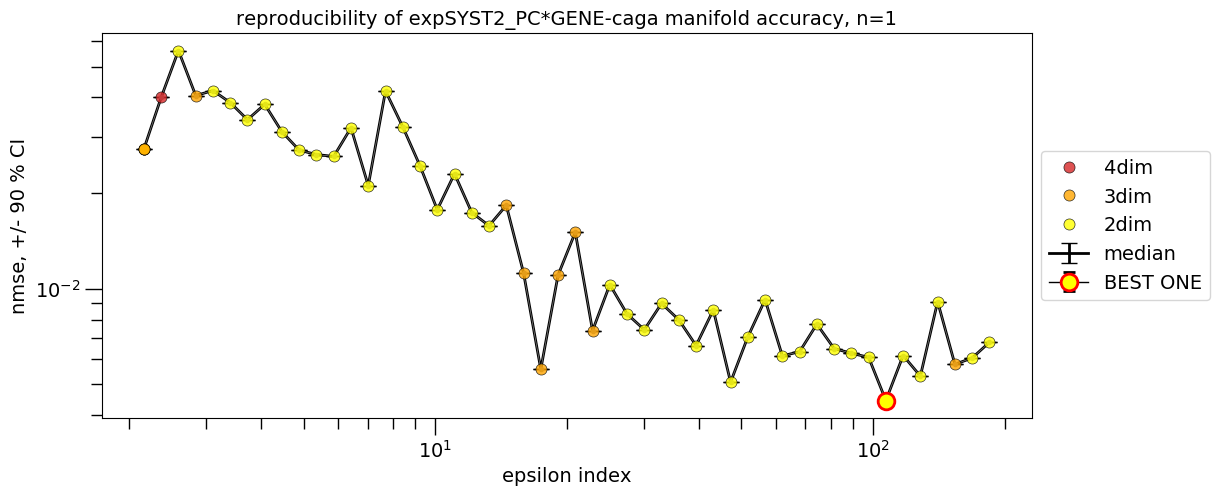

(500, 30)
(30,)
()
ev_in= [1 4]
epsilon error
(2,)

saving here... /Users/frick/Dparams/DParamsFinal_v8/agnostic-AGI-zto_numeps50-1dot5-4_rdimval50_n-evecs30cut-True_promval-0dot01_SI-10_subsampF10_sampmax500/csvfiles/

saving as...  expSYST2_PC-GENE-caga -[identifier].csv
expSYST2_PC-GENE-caga
('expSYST2_PC', 'RFP-iffl')
epssearchexpSYST2_PC-RFP-ifflpickle
using ein
experiment with best accuracy =  epssearchexpSYST2_PC-RFP-ifflpickle
dimensionality with best accuracy =  [1 3 6]
best accuracy =  0.011521162330228998
epssearchexpSYST2_PC-RFP-ifflpickle


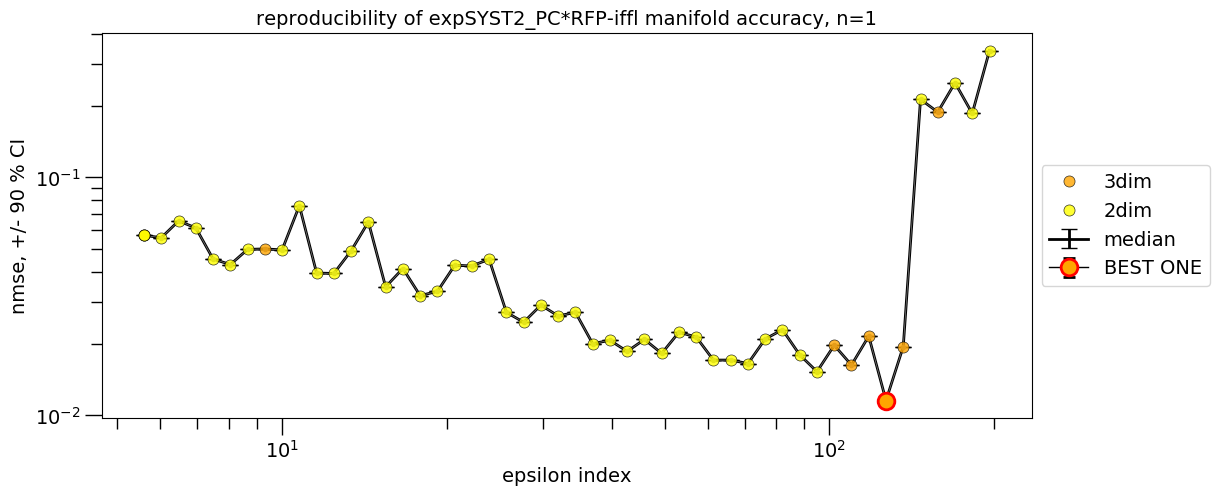

(500, 30)
(30,)
()
ev_in= [1 3 6]
epsilon error
(3,)

saving here... /Users/frick/Dparams/DParamsFinal_v8/agnostic-AGI-zto_numeps50-1dot5-4_rdimval50_n-evecs30cut-True_promval-0dot01_SI-10_subsampF10_sampmax500/csvfiles/

saving as...  expSYST2_PC-RFP-iffl -[identifier].csv
expSYST2_PC-RFP-iffl
('expSYST2_PC', 'RFP-caga')
epssearchexpSYST2_PC-RFP-cagapickle
using ein
experiment with best accuracy =  epssearchexpSYST2_PC-RFP-cagapickle
dimensionality with best accuracy =  [1 4 6]
best accuracy =  0.002167503177635044
epssearchexpSYST2_PC-RFP-cagapickle


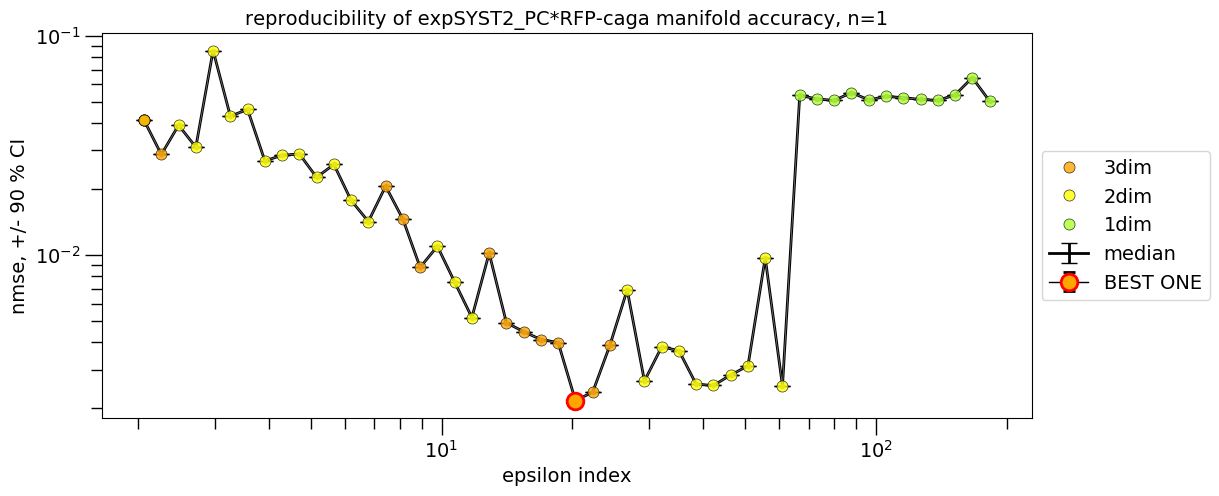

(500, 30)
(30,)
()
ev_in= [1 4 6]
epsilon error
(3,)

saving here... /Users/frick/Dparams/DParamsFinal_v8/agnostic-AGI-zto_numeps50-1dot5-4_rdimval50_n-evecs30cut-True_promval-0dot01_SI-10_subsampF10_sampmax500/csvfiles/

saving as...  expSYST2_PC-RFP-caga -[identifier].csv
expSYST2_PC-RFP-caga
('expSYST5_PC', 'GENE-iffl')
epssearchexpSYST5_PC-GENE-ifflpickle
using ein
experiment with best accuracy =  epssearchexpSYST5_PC-GENE-ifflpickle
dimensionality with best accuracy =  [ 1  5  7 19]
best accuracy =  0.010852164141807974
epssearchexpSYST5_PC-GENE-ifflpickle


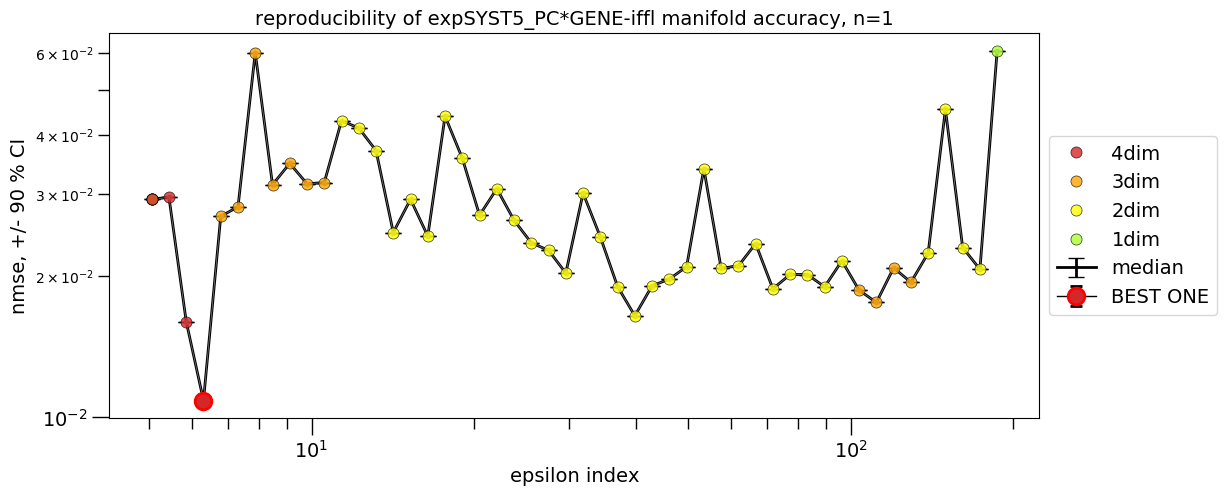

(500, 30)
(30,)
()
ev_in= [ 1  5  7 19]
epsilon error
(4,)

saving here... /Users/frick/Dparams/DParamsFinal_v8/agnostic-AGI-zto_numeps50-1dot5-4_rdimval50_n-evecs30cut-True_promval-0dot01_SI-10_subsampF10_sampmax500/csvfiles/

saving as...  expSYST5_PC-GENE-iffl -[identifier].csv
expSYST5_PC-GENE-iffl
('expSYST5_PC', 'GENE-caga')
epssearchexpSYST5_PC-GENE-cagapickle
using ein
experiment with best accuracy =  epssearchexpSYST5_PC-GENE-cagapickle
dimensionality with best accuracy =  [1 6]
best accuracy =  0.005448899347899506
epssearchexpSYST5_PC-GENE-cagapickle


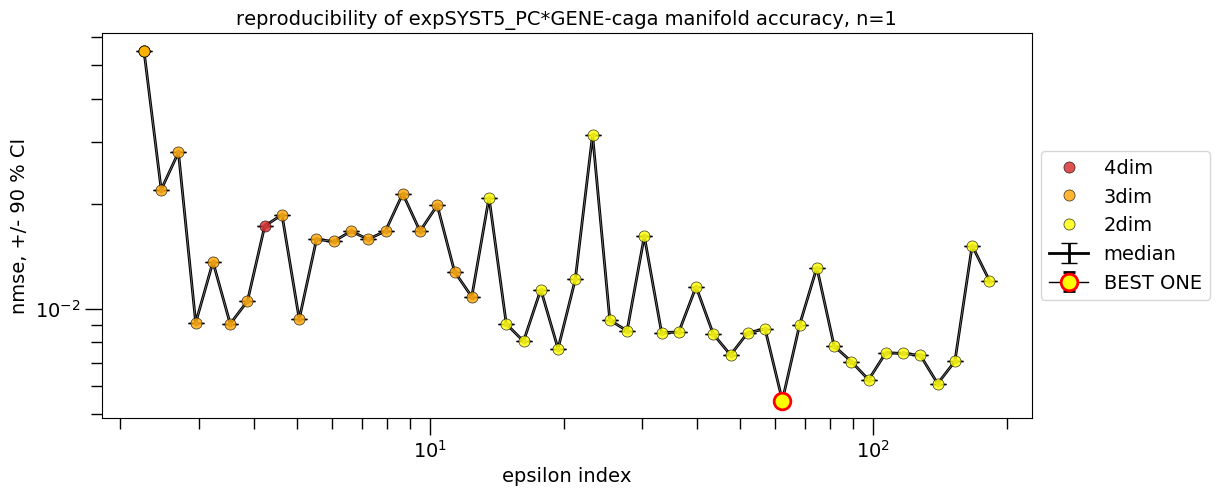

(500, 30)
(30,)
()
ev_in= [1 6]
epsilon error
(2,)

saving here... /Users/frick/Dparams/DParamsFinal_v8/agnostic-AGI-zto_numeps50-1dot5-4_rdimval50_n-evecs30cut-True_promval-0dot01_SI-10_subsampF10_sampmax500/csvfiles/

saving as...  expSYST5_PC-GENE-caga -[identifier].csv
expSYST5_PC-GENE-caga
('expSYST5_PC', 'RFP-iffl')
epssearchexpSYST5_PC-RFP-ifflpickle
using ein
experiment with best accuracy =  epssearchexpSYST5_PC-RFP-ifflpickle
dimensionality with best accuracy =  [1 4]
best accuracy =  0.014798920631973316
epssearchexpSYST5_PC-RFP-ifflpickle


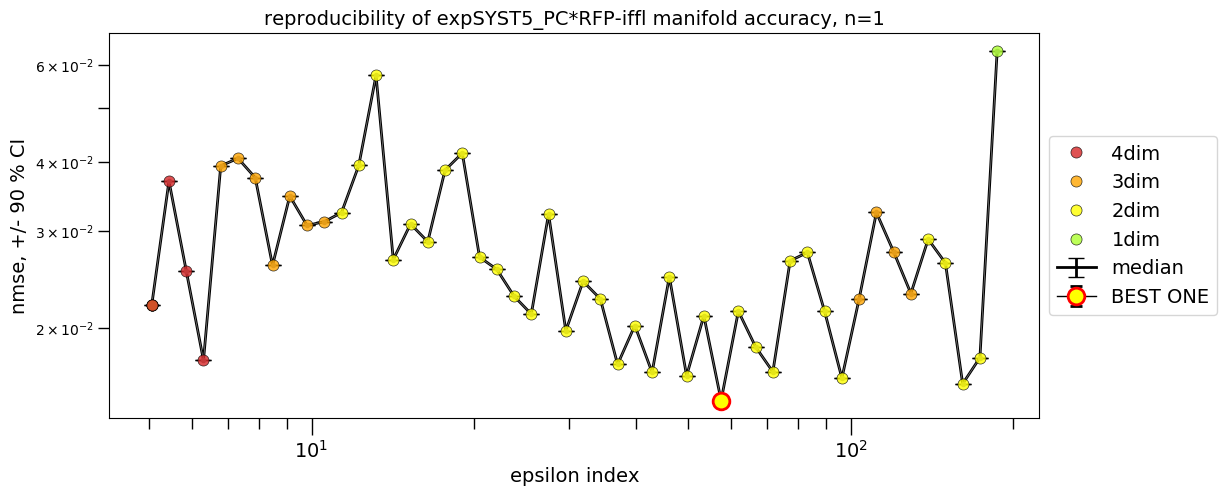

(500, 30)
(30,)
()
ev_in= [1 4]
epsilon error
(2,)

saving here... /Users/frick/Dparams/DParamsFinal_v8/agnostic-AGI-zto_numeps50-1dot5-4_rdimval50_n-evecs30cut-True_promval-0dot01_SI-10_subsampF10_sampmax500/csvfiles/

saving as...  expSYST5_PC-RFP-iffl -[identifier].csv
expSYST5_PC-RFP-iffl
('expSYST5_PC', 'RFP-caga')
epssearchexpSYST5_PC-RFP-cagapickle
using ein
experiment with best accuracy =  epssearchexpSYST5_PC-RFP-cagapickle
dimensionality with best accuracy =  [1 3]
best accuracy =  0.002536227137071073
epssearchexpSYST5_PC-RFP-cagapickle


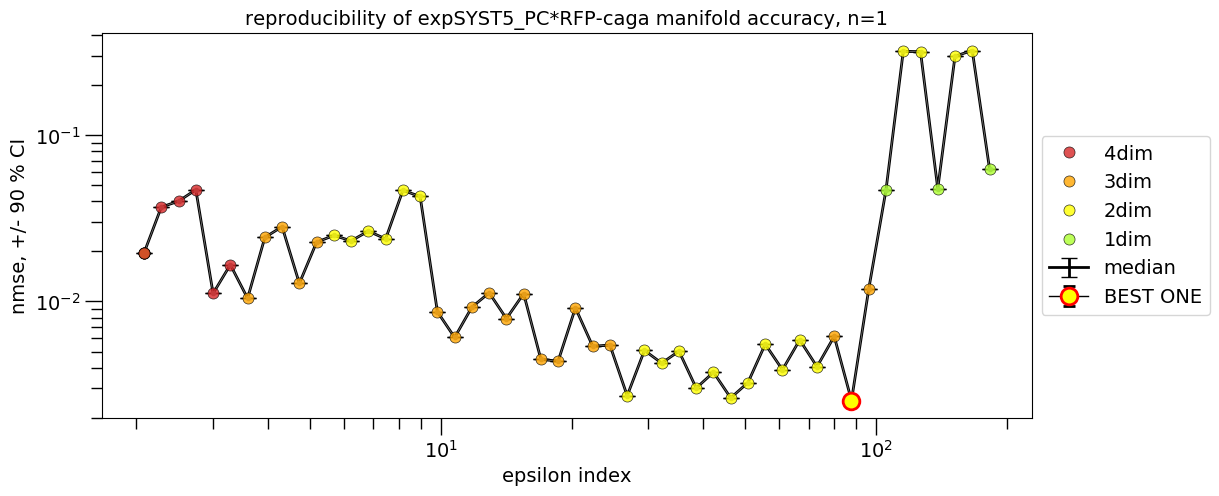

(500, 30)
(30,)
()
ev_in= [1 3]
epsilon error
(2,)

saving here... /Users/frick/Dparams/DParamsFinal_v8/agnostic-AGI-zto_numeps50-1dot5-4_rdimval50_n-evecs30cut-True_promval-0dot01_SI-10_subsampF10_sampmax500/csvfiles/

saving as...  expSYST5_PC-RFP-caga -[identifier].csv
expSYST5_PC-RFP-caga
('exp3', 'SMAD-median')
epssearchexp3-SMAD-medianpickle
using ein
experiment with best accuracy =  epssearchexp3-SMAD-medianpickle
dimensionality with best accuracy =  [ 1  4  6 10 20]
best accuracy =  0.03852697780789643
epssearchexp3-SMAD-medianpickle


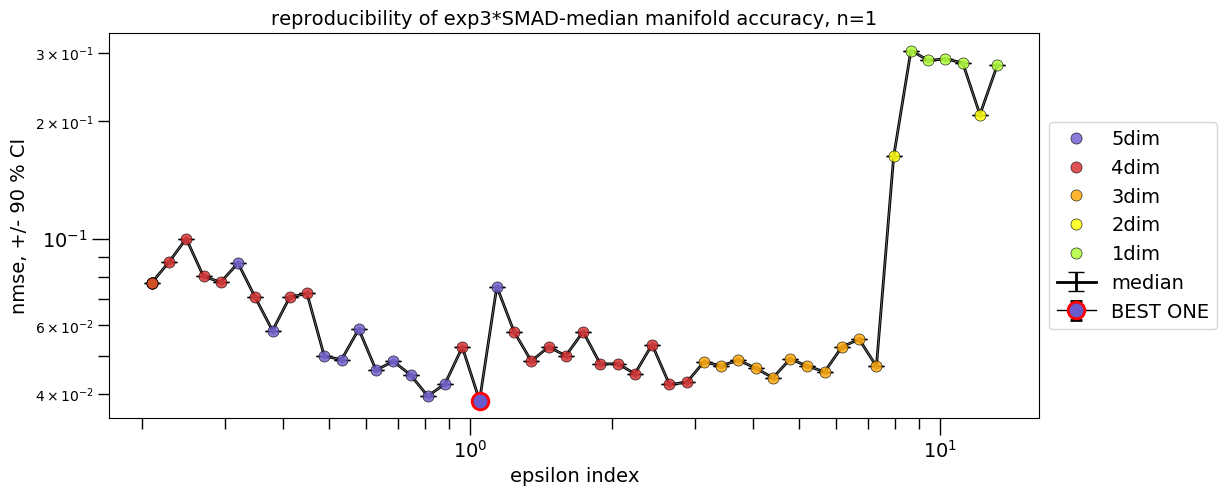

(425, 30)
(30,)
()
ev_in= [ 1  4  6 10 20]
epsilon error
(5,)

saving here... /Users/frick/Dparams/DParamsFinal_v8/agnostic-AGI-zto_numeps50-1dot5-4_rdimval50_n-evecs30cut-True_promval-0dot01_SI-10_subsampF10_sampmax500/csvfiles/

saving as...  exp3-SMAD-median -[identifier].csv
exp3-SMAD-median
('exp3', 'SMAD-total')
epssearchexp3-SMAD-totalpickle
using ein
experiment with best accuracy =  epssearchexp3-SMAD-totalpickle
dimensionality with best accuracy =  [ 1  4  8 12 19]
best accuracy =  0.029604465949206016
epssearchexp3-SMAD-totalpickle


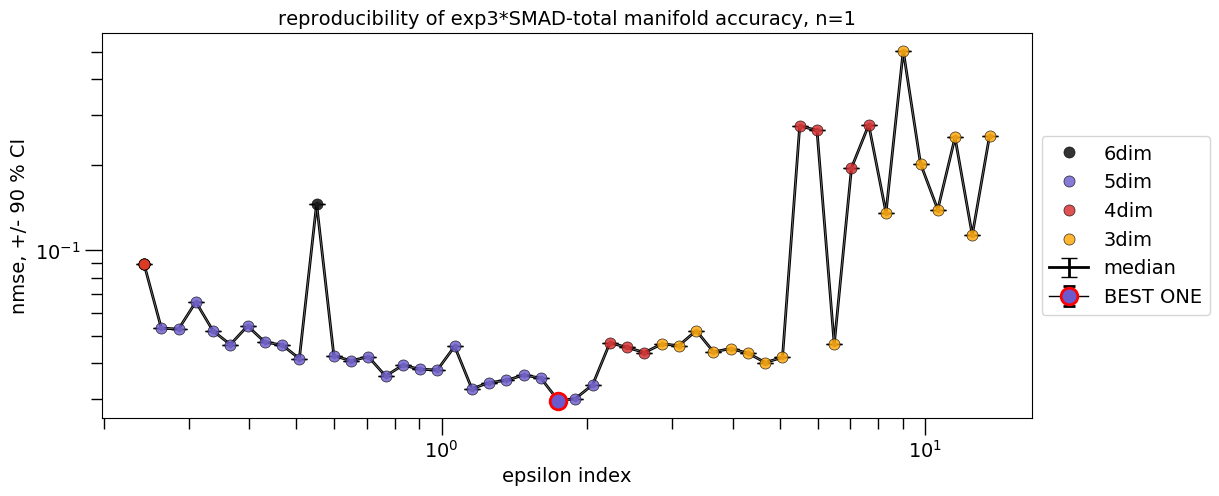

(425, 30)
(30,)
()
ev_in= [ 1  4  8 12 19]
epsilon error
(5,)

saving here... /Users/frick/Dparams/DParamsFinal_v8/agnostic-AGI-zto_numeps50-1dot5-4_rdimval50_n-evecs30cut-True_promval-0dot01_SI-10_subsampF10_sampmax500/csvfiles/

saving as...  exp3-SMAD-total -[identifier].csv
exp3-SMAD-total
('exp3', 'SNAIL-median')
epssearchexp3-SNAIL-medianpickle
using ein
experiment with best accuracy =  epssearchexp3-SNAIL-medianpickle
dimensionality with best accuracy =  [ 1  3 13]
best accuracy =  0.06295340012327627
epssearchexp3-SNAIL-medianpickle


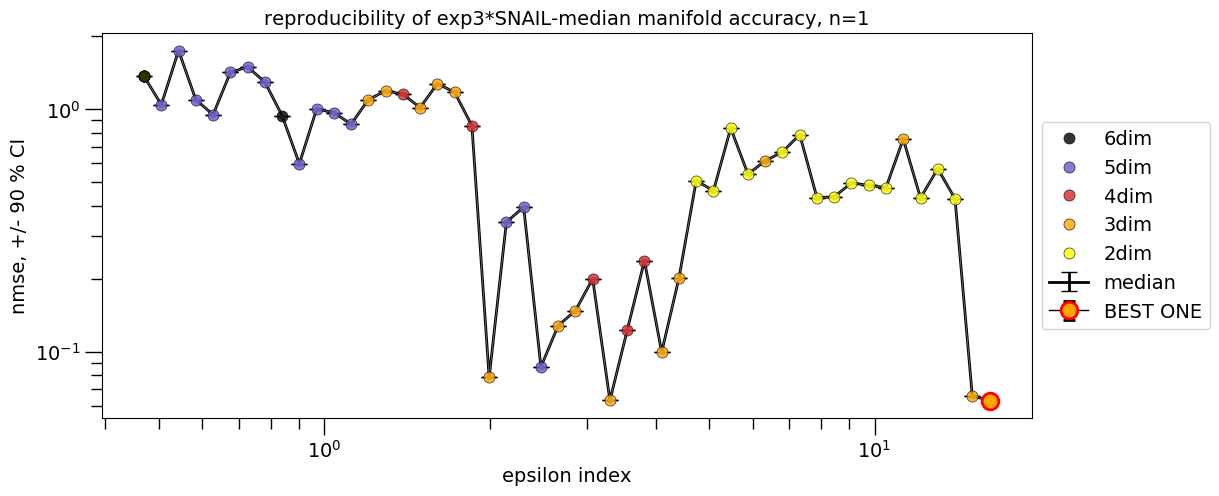

(425, 30)
(30,)
()
ev_in= [ 1  3 13]
epsilon error
(3,)

saving here... /Users/frick/Dparams/DParamsFinal_v8/agnostic-AGI-zto_numeps50-1dot5-4_rdimval50_n-evecs30cut-True_promval-0dot01_SI-10_subsampF10_sampmax500/csvfiles/

saving as...  exp3-SNAIL-median -[identifier].csv
exp3-SNAIL-median
('exp3', 'SNAIL-total')
epssearchexp3-SNAIL-totalpickle
using ein
experiment with best accuracy =  epssearchexp3-SNAIL-totalpickle
dimensionality with best accuracy =  [ 1  4 13]
best accuracy =  0.027776907133040478
epssearchexp3-SNAIL-totalpickle


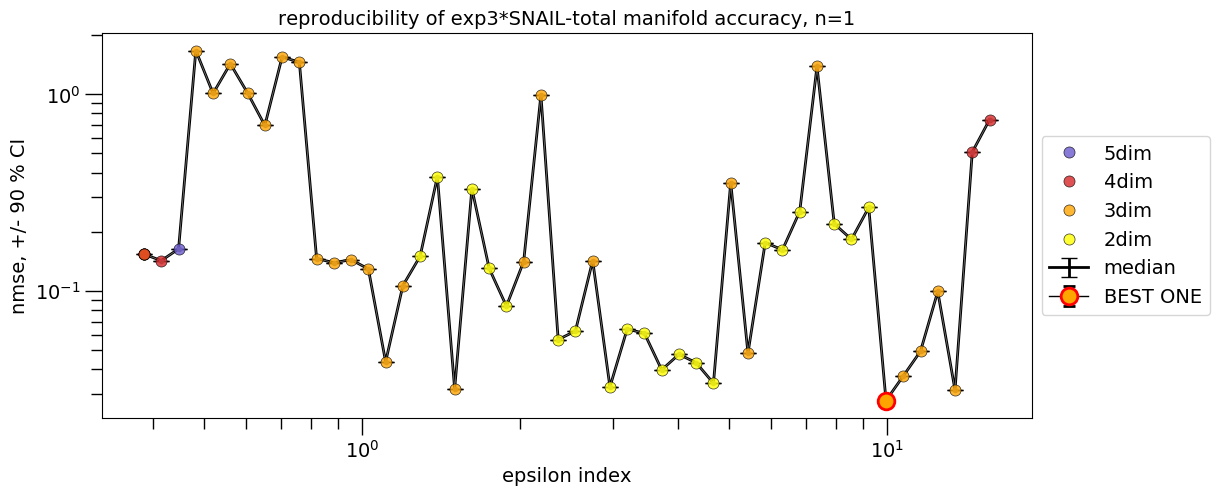

(425, 30)
(30,)
()
ev_in= [ 1  4 13]
epsilon error
(3,)

saving here... /Users/frick/Dparams/DParamsFinal_v8/agnostic-AGI-zto_numeps50-1dot5-4_rdimval50_n-evecs30cut-True_promval-0dot01_SI-10_subsampF10_sampmax500/csvfiles/

saving as...  exp3-SNAIL-total -[identifier].csv
exp3-SNAIL-total
('exp4', 'SMAD-median')
epssearchexp4-SMAD-medianpickle
using ein
experiment with best accuracy =  epssearchexp4-SMAD-medianpickle
dimensionality with best accuracy =  [1 3 7]
best accuracy =  0.047037766380519236
epssearchexp4-SMAD-medianpickle


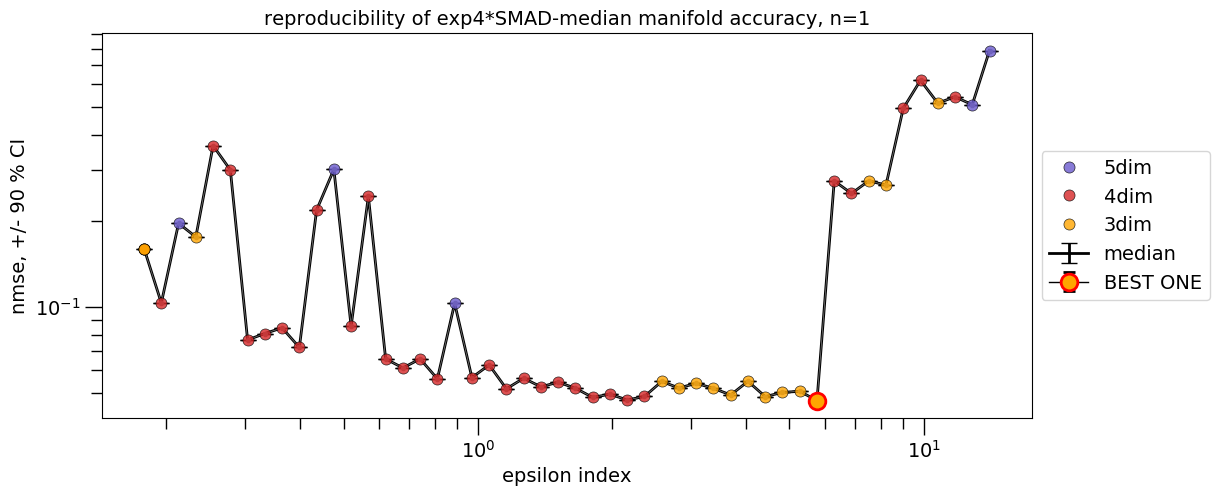

(379, 30)
(30,)
()
ev_in= [1 3 7]
epsilon error
(3,)

saving here... /Users/frick/Dparams/DParamsFinal_v8/agnostic-AGI-zto_numeps50-1dot5-4_rdimval50_n-evecs30cut-True_promval-0dot01_SI-10_subsampF10_sampmax500/csvfiles/

saving as...  exp4-SMAD-median -[identifier].csv
exp4-SMAD-median
('exp4', 'SMAD-total')
epssearchexp4-SMAD-totalpickle
using ein
experiment with best accuracy =  epssearchexp4-SMAD-totalpickle
dimensionality with best accuracy =  [ 1  6 10]
best accuracy =  0.04608402387844267
epssearchexp4-SMAD-totalpickle


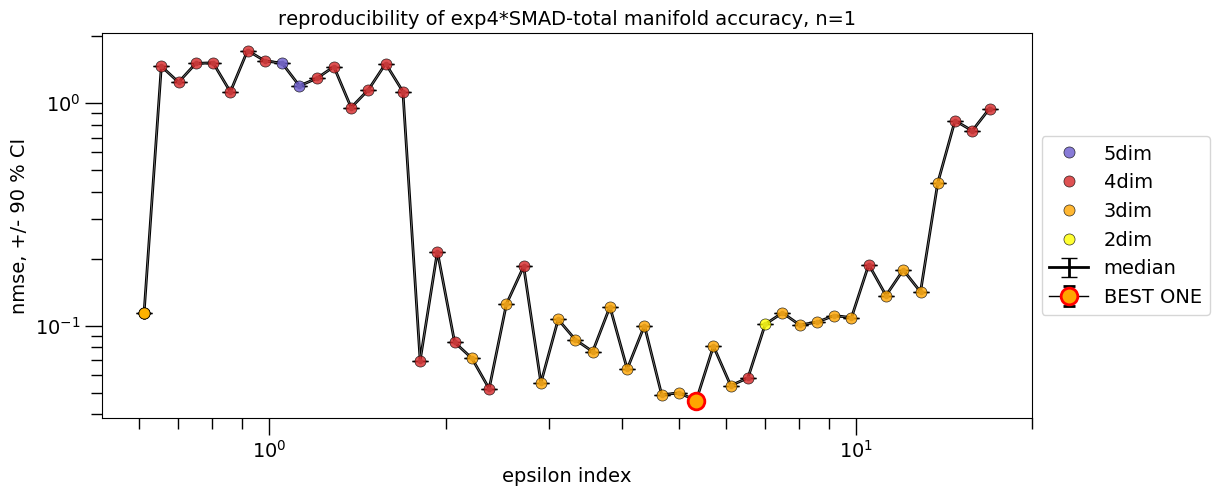

(379, 30)
(30,)
()
ev_in= [ 1  6 10]
epsilon error
(3,)

saving here... /Users/frick/Dparams/DParamsFinal_v8/agnostic-AGI-zto_numeps50-1dot5-4_rdimval50_n-evecs30cut-True_promval-0dot01_SI-10_subsampF10_sampmax500/csvfiles/

saving as...  exp4-SMAD-total -[identifier].csv
exp4-SMAD-total
('exp4', 'SNAIL-median')
epssearchexp4-SNAIL-medianpickle
using ein
experiment with best accuracy =  epssearchexp4-SNAIL-medianpickle
dimensionality with best accuracy =  [1 4]
best accuracy =  0.03954099110316051
epssearchexp4-SNAIL-medianpickle


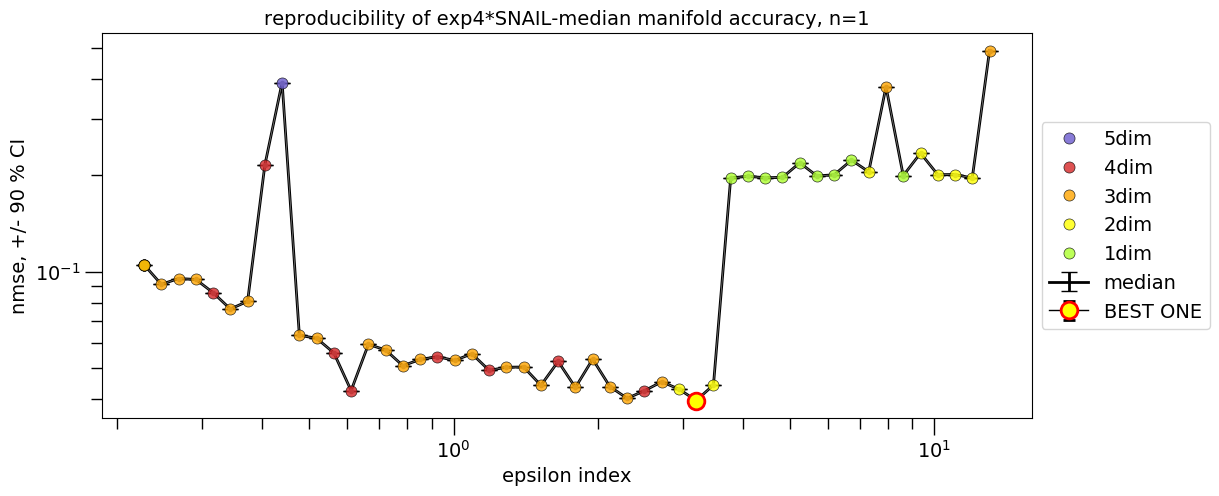

(379, 30)
(30,)
()
ev_in= [1 4]
epsilon error
(2,)

saving here... /Users/frick/Dparams/DParamsFinal_v8/agnostic-AGI-zto_numeps50-1dot5-4_rdimval50_n-evecs30cut-True_promval-0dot01_SI-10_subsampF10_sampmax500/csvfiles/

saving as...  exp4-SNAIL-median -[identifier].csv
exp4-SNAIL-median
('exp4', 'SNAIL-total')
epssearchexp4-SNAIL-totalpickle
using ein
experiment with best accuracy =  epssearchexp4-SNAIL-totalpickle
dimensionality with best accuracy =  [ 1  4 11]
best accuracy =  0.025288641486598245
epssearchexp4-SNAIL-totalpickle


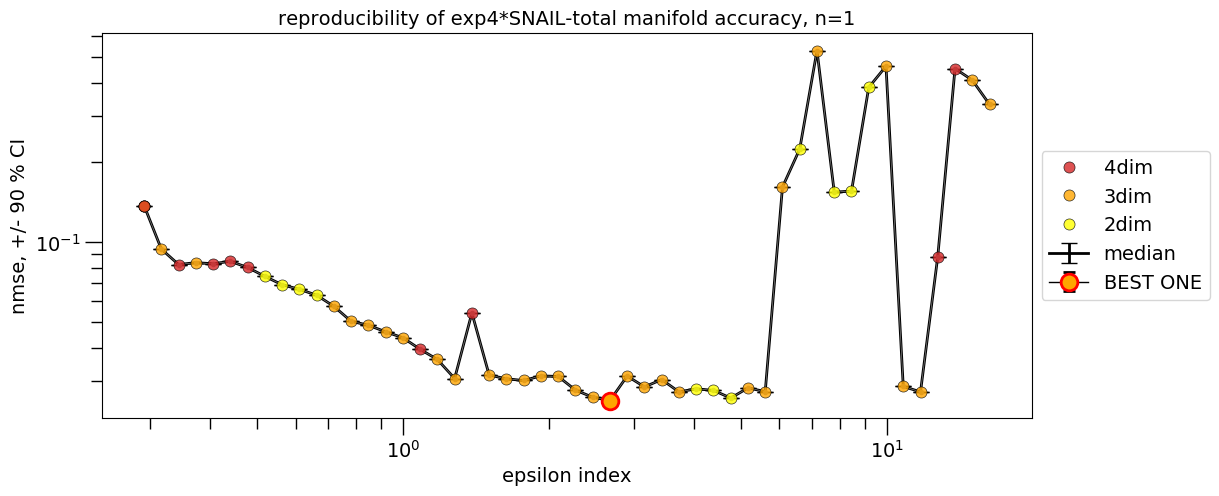

(379, 30)
(30,)
()
ev_in= [ 1  4 11]
epsilon error
(3,)

saving here... /Users/frick/Dparams/DParamsFinal_v8/agnostic-AGI-zto_numeps50-1dot5-4_rdimval50_n-evecs30cut-True_promval-0dot01_SI-10_subsampF10_sampmax500/csvfiles/

saving as...  exp4-SNAIL-total -[identifier].csv
exp4-SNAIL-total
('exp5', 'SMAD-median')
epssearchexp5-SMAD-medianpickle
using ein
experiment with best accuracy =  epssearchexp5-SMAD-medianpickle
dimensionality with best accuracy =  [ 1  3  7  9 17]
best accuracy =  0.037531012924356504
epssearchexp5-SMAD-medianpickle


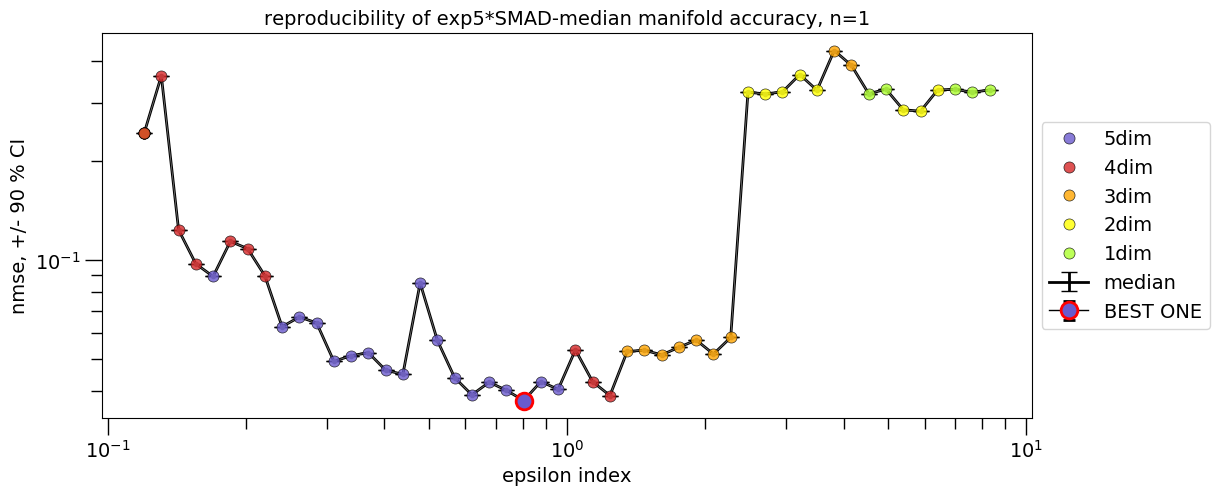

(392, 30)
(30,)
()
ev_in= [ 1  3  7  9 17]
epsilon error
(5,)

saving here... /Users/frick/Dparams/DParamsFinal_v8/agnostic-AGI-zto_numeps50-1dot5-4_rdimval50_n-evecs30cut-True_promval-0dot01_SI-10_subsampF10_sampmax500/csvfiles/

saving as...  exp5-SMAD-median -[identifier].csv
exp5-SMAD-median
('exp5', 'SMAD-total')
epssearchexp5-SMAD-totalpickle
using ein
experiment with best accuracy =  epssearchexp5-SMAD-totalpickle
dimensionality with best accuracy =  [ 1  4 14]
best accuracy =  0.03773785810135796
epssearchexp5-SMAD-totalpickle


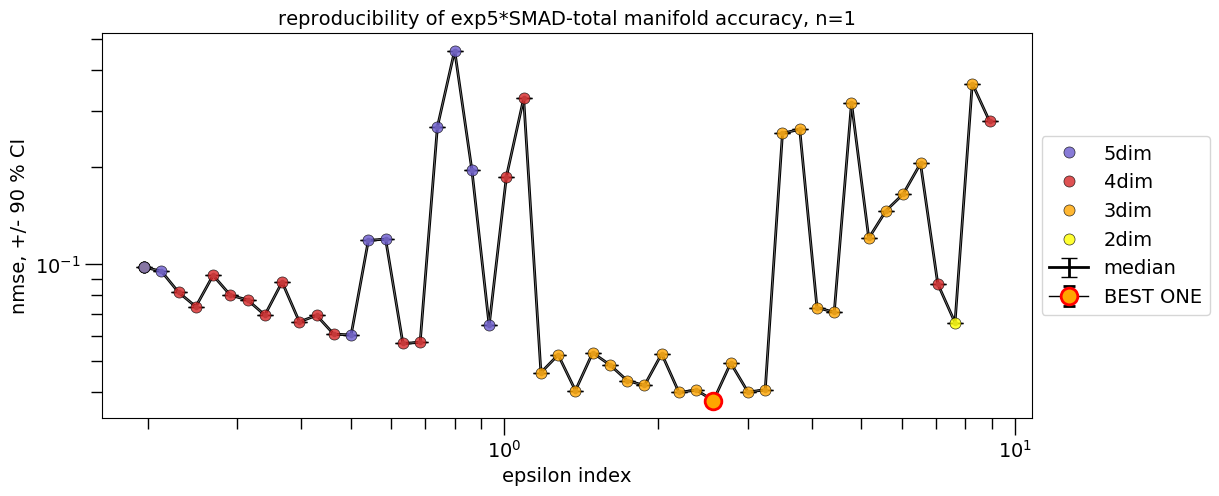

(392, 30)
(30,)
()
ev_in= [ 1  4 14]
epsilon error
(3,)

saving here... /Users/frick/Dparams/DParamsFinal_v8/agnostic-AGI-zto_numeps50-1dot5-4_rdimval50_n-evecs30cut-True_promval-0dot01_SI-10_subsampF10_sampmax500/csvfiles/

saving as...  exp5-SMAD-total -[identifier].csv
exp5-SMAD-total
('exp5', 'SNAIL-median')
epssearchexp5-SNAIL-medianpickle
using ein
experiment with best accuracy =  epssearchexp5-SNAIL-medianpickle
dimensionality with best accuracy =  [1 3]
best accuracy =  0.02455029318036408
epssearchexp5-SNAIL-medianpickle


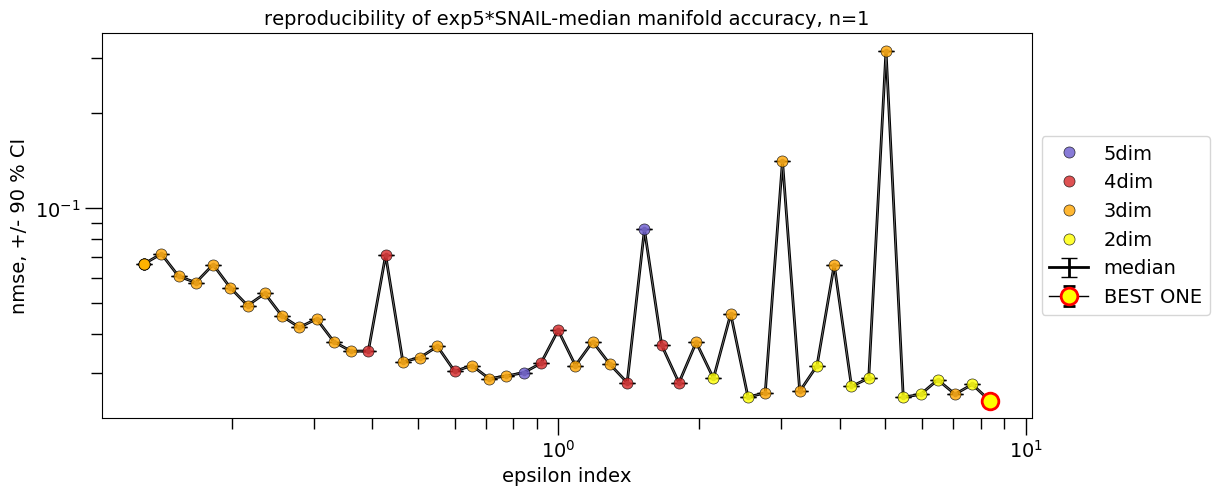

(392, 30)
(30,)
()
ev_in= [1 3]
epsilon error
(2,)

saving here... /Users/frick/Dparams/DParamsFinal_v8/agnostic-AGI-zto_numeps50-1dot5-4_rdimval50_n-evecs30cut-True_promval-0dot01_SI-10_subsampF10_sampmax500/csvfiles/

saving as...  exp5-SNAIL-median -[identifier].csv
exp5-SNAIL-median
('exp5', 'SNAIL-total')
epssearchexp5-SNAIL-totalpickle
using ein
experiment with best accuracy =  epssearchexp5-SNAIL-totalpickle
dimensionality with best accuracy =  [1 5 9]
best accuracy =  0.025697320043793312
epssearchexp5-SNAIL-totalpickle


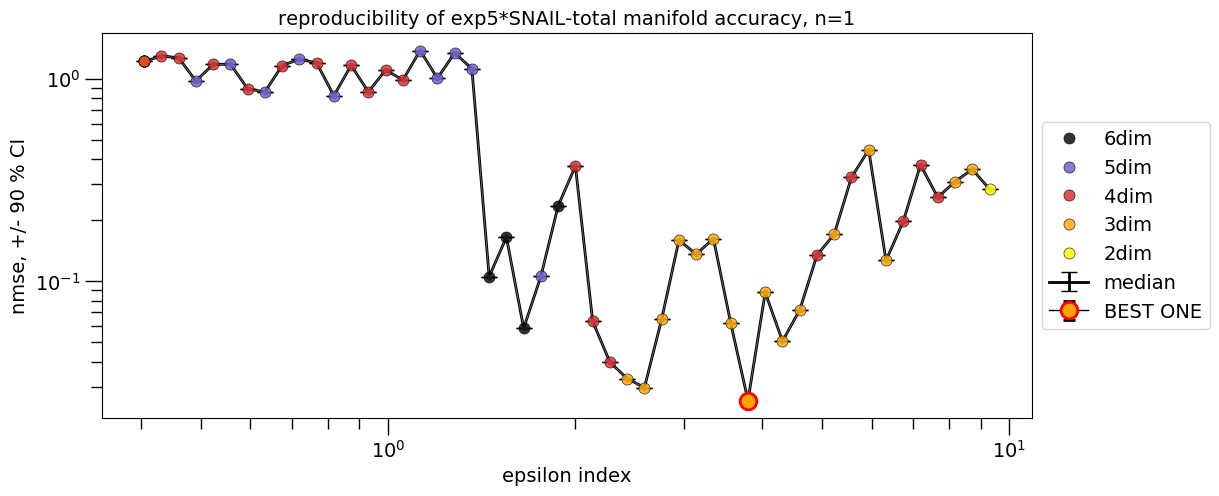

(392, 30)
(30,)
()
ev_in= [1 5 9]
epsilon error
(3,)

saving here... /Users/frick/Dparams/DParamsFinal_v8/agnostic-AGI-zto_numeps50-1dot5-4_rdimval50_n-evecs30cut-True_promval-0dot01_SI-10_subsampF10_sampmax500/csvfiles/

saving as...  exp5-SNAIL-total -[identifier].csv
exp5-SNAIL-total


In [2]:
from pathlib import Path
cwd = Path().resolve()
print(cwd)
import sys
sys.path.insert(0, cwd) 


import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as manimation
import numpy as np

import matplotlib.tri as mtri

from scipy.integrate import odeint
from scipy.integrate import complex_ode

import scipy.spatial.distance
import scipy
import scipy.interpolate
import scipy.signal
import itertools 
import re

from dmap_sp_chrisNEW import *
import os

import dmap_sp_chrisNEW
import importlib
importlib.reload(dmap_sp_chrisNEW)
    
from accessory import *


specidpath = specid.replace(".", "dot")

repo = str(cwd) +'/'

# ########################  IMPORT   ############################
import dill as pickle;
#     from pathlib import Path



session_savepath =  specidpath + '/'
session_path = repo + session_savepath

#     print(not (os.path.isdir(session_path)))
if not (os.path.isdir(session_path)):
    print('making' + session_path + '...')
    error('incoddrect directory')




filenames = list()
for file in os.listdir(session_path):
    if file.endswith("pickle"):
        if bool(re.search('SMAD-rsmad',file)):
            filenames = filenames + list([file])
#             print(os.path.join(session_path,file))
#             filenames = filenames + list(str((os.path.join(session_path,file))))




print(len(dall), ' runs to perform')
for dd in dall:
    print(dd)

############ this block of code plots an median of all +/- 90% CI ########################  


#     checkstr1 = 'exp'
#     checkstr2 = 'SMAD-rsmad'
    checkstr1 = dd[0]
    checkstr2 = dd[1]
    filenames = list()
    for file in os.listdir(session_path):
        if file.endswith("pickle"):
            if (bool(re.search(checkstr1,file)) & (bool(re.search(checkstr2,file)))):
                filenames = filenames + list([file])   

  

    [print(x) for x in filenames]
    file = filenames[0]
    pickle.load_session(session_path + file)
    

    #OK so on closer examination, the DMAPS are not any better or worse. 
#previously I considered DMAPS where epsmax was too high (see directory below for thos files)
#/Users/frick/Dparams/DParamsFinal_v5/agnostic-AGI-zto_numeps50-1dot2-4_rdimval50_n-evecs30cut-True_promval-0dot05_SI-20_subsampF8_sampmax500/csvfilesOLD_epsmaxtoohigh
    accuracyMatrix = np.zeros((len(filenames),accvali2.shape[1]))
    cycle=-1
    gooddimsall=list()
    evecs_evals_dim_keep = {}
    for file in filenames:
        cycle=cycle+1
        pickle.load_session(session_path + file)
        cyv = cycle
        

        accy = accvali2.copy()
        accuracyMatrix[cyv,:] = accy[0,:]
        gooddims = list(accstri22[0].values())
        gooddimsall = gooddimsall + [gooddims]
        evecs_evals_dim_keep[cycle]=ein
        print('using ein')

        
    

    epsfact = epsfactin
        
                 
#     removenum = 6
#     accuracyMatrix = np.zeros((len(filenames),(accvali2.shape[1]-removenum)))
#     print('accuracyMatrix.shape = ',accuracyMatrix.shape)
#     subidx = np.asarray([int(x) for x in range(accuracyMatrix.shape[1])]).reshape(-1,)
#     cycle=-1
#     gooddimsall=list()
#     evecs_evals_dim_keep = {}
#     for file in filenames:
#         cycle=cycle+1
#         pickle.load_session(session_path + file)
#         cyv = cycle
#         if bool(re.search('SMAD',checkstr1+checkstr2)):
#             print('using ein')
# #             print('gooddims',gooddims)
# #             print('subidx',subidx)
# #             print('gooddims[subidx]',gooddims[subidx])
#             accy = accvali2.copy()
#             accuracyMatrix[cyv,:] = accy[0,subidx]
#             gooddims = list(accstri22[0].values())
#             gooddims = [gooddims[x] for x in list(subidx)]
#             gooddimsall = gooddimsall + [gooddims]
#             evecs_evals_dim_keep[cycle]=ein

#         else:
#             print('using eout')
#             accy = accvalo2.copy()
#             accuracyMatrix[cyv,subidx] = accy[0,subidx]
#             gooddims = list(accstro22[0].values())
#             gooddims = [gooddims[x] for x in list(subidx)]
#             gooddimsall = gooddimsall + [gooddims]
#             evecs_evals_dim_keep[cycle]=eout


                
#     if bool(re.search('GENE',checkstr2)):
#         epsfact = epsfactout[subidx]
#     else:
#         epsfact = epsfactin[subidx]
        
#     print('len(goddimsall)',len(gooddimsall))
#     print('epsfact.shape',epsfact.shape)
        
        
    

    fontsize=18
    macc = np.mean(accuracyMatrix,axis=0)
    yerrup = np.percentile(accuracyMatrix,95,axis=0) - macc
    yerrdown = macc - np.percentile(accuracyMatrix,5,axis=0)
    x = np.asarray(range(len(macc)))
    y = macc.copy()
    yerr = np.vstack((yerrdown,yerrup))
    
    
    #determine best accuracy best on proximity to calculated epsilon
#     ymin = np.min(y)
#     contenderLocs = np.where(y<(ymin*1.05))[0]
#     print(contenderLocs)
#     bestContendersAreCloseToZero = np.absolute(contenderLocs - np.ceil(len(y)/2))
#     print(bestContendersAreCloseToZero)
#     bcloc = np.argmin(bestContendersAreCloseToZero)
#     ybestloc = int(contenderLocs[bcloc])
#     ymin = y[ybestloc]
#     yminloc = ybestloc
    
    #determine best accuracy best, just based on best accuracy
    ymin = np.min(y)
    yminloc = np.argmin(y)

    
    iterationWithMin = np.argmin(accuracyMatrix[:,yminloc])
    print('experiment with best accuracy = ', filenames[iterationWithMin])
    dimensionsWithMin = gooddimsall[iterationWithMin]
    gooddimension = dimensionsWithMin[yminloc]
    print('dimensionality with best accuracy = ',gooddimension)
    print('best accuracy = ',ymin)


        
#     plt.style.use('seaborn-ticks')
    plt.style.use('fast')
    plt.style.use('default')
    
    
    def plotaccmultidim8(accy,acclab,ndims,smadsnail,epsfact,mshape,labelsused,colorlist):
        fontsize = 14
        msize=8
        labelsv0 = acclab
        labelsv  = [labelsv0[x] for x in range(0,len(labelsv0))]
        dimlist = [len(x) for x in labelsv]
        ndims = np.max(dimlist)
        ndimsmin = np.min(dimlist)
        accy0 = accy.reshape(-1,)
        legstr={}
        plt.semilogy(epsfact,accy0,'.-',label="",linewidth=0.5,color='gray')
#         colorlist = ['cyan','orange','yellow','red','cyan']
#         colorlist = ['goldenrod','tab:orange','royalblue','lightcoral','slateblue']
        
        vl = list(range(ndimsmin-1,ndims)[::-1])
        if not vl:
            print(dimlist)
            vl=[ndims]
        if not len(labelsused)>0:
            for v in vl:
                labelstr = str(v+1)+"dim"
                plt.semilogy(epsfact[0],accy0[0],mshape, markeredgewidth=0.5,markeredgecolor='black', markerfacecolor=colorlist[v],markersize=msize,label= labelstr,alpha=0.8,zorder=10)
                labelsused = labelsused+list([labelstr])

        for v in vl:
            idx = np.where(np.asarray(dimlist).reshape(-1,) == v+1)[0]
            if len(idx)>0:
                labelstr=''
#                 labelstr = str(v+1)+"dim"
#                 if len(labelsused)>0:
#                     if np.sum([bool(re.search(x,labelstr)) for x in labelsused])>0:
#                         labelstr = ''
#                     else:
#                         labelsused = labelsused+list([labelstr])
#                 else:
#                     labelsused = labelsused+list([labelstr])
                

                        
                plt.semilogy(epsfact[idx],accy0[idx], mshape,markeredgewidth=0.5, markeredgecolor='black', markerfacecolor=colorlist[v],markersize=msize,label= labelstr, alpha=.8,zorder=10)
        return labelsused
    
    fig = plt.figure(figsize=(12,5))
    msize=8
    fontsize=14
    colorlist = ['greenyellow','yellow','orange','tab:red','slateblue','black','deeppink']
    
    #now plot medians +/- errors
    plt.errorbar(epsfact,y,yerr,marker='',color='black',markerfacecolor='black',markersize=msize,linewidth=2,elinewidth=2,capsize=6,label='median',zorder=-10)
#     plt.errorbar(x,y,yerr,marker='.',color='black',markerfacecolor='grey',markersize=msize,linewidth=2,elinewidth=2,capsize=6,label='median',zorder=-10)
    
    print(file)
    #now plot individuals and color by dimensionality
    shaper = iter(['o','s','v','*','D','^'])
    labelsused = list()
    for xi in range((accuracyMatrix.shape[0])):

        accy = accuracyMatrix[xi,:].copy()
        acclab = gooddimsall[xi].copy()
        smadsnail = checkstr1+checkstr2
        mshape = next(shaper)
#         acclab = [acclab[x] for x in subidx]
        labelsused = plotaccmultidim8(accy,acclab,ndims,smadsnail,epsfact,mshape,labelsused,colorlist)
     
    #now plot the chosen one
    v2 = len(gooddimension)-1
    plt.errorbar(epsfact[yminloc],ymin,0,marker='o',color='black',markerfacecolor=colorlist[v2],markeredgewidth=2, markerEdgeColor='r',markersize=msize*1.5,linewidth=1,elinewidth=1,capsize=4, label='BEST ONE',zorder=20)
    
    #now set plot axes
    plt.yscale('log')
    plt.xscale('log')
    plt.ylabel('nmse, +/- 90 % CI',fontsize=fontsize)
    plt.xlabel('epsilon index',fontsize=fontsize)
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.title('reproducibility of ' + checkstr1+'*'+checkstr2 + ' manifold accuracy, n=' + str(len(filenames)),fontsize=fontsize)
    plt.legend(fontsize=fontsize,loc='center left', bbox_to_anchor=(1, 0.5))
    ax = plt.gca()
    ax.tick_params(which='major',length=12,width=1)
    ax.tick_params(which='minor',length=8,width=1)
    

    savedir = str(cwd) + '/' + specidpath + '/'
    
    if not os.path.exists(savedir):
        os.makedirs(savedir)
    savedir2 = savedir + '/' + 'accuracy reproducibility/'
    if not os.path.exists(savedir2):
        os.makedirs(savedir2)
        
    savestr = savedir2 + checkstr1 + '-' + checkstr2
    
    plt.savefig(savestr,bbox_inches='tight')
    plt.show()

    
    #######################manually choose#################################
#     yminloc=6
#     ev_in = np.asarray(list(dimensionsWithMin[yminloc]))
    #######################################################
    ev_in = gooddimension
    ein_c = evecs_evals_dim_keep[iterationWithMin]
    eall = ein_c[yminloc]
    evecs_in = eall[0]
    evals_in = eall[1]
    eps_in = eall[2]
    
#     ev_in = np.asarray(list(acclab[0][a]))

    
    # you need to decide how to save these CSV files...
    ## maybe you should save one CSV for R-Smad, Complex
    ## then save IFFL, and CAGA for SYST1, SYST2 and SYST3
    

    print(evecs_in.shape)
    print(evals_in.shape)
    print(eps_in.shape)
    print('ev_in=',ev_in)
    if not eps_in.shape:
        eps_in = [1,1,1]
        print('epsilon error')
    print(ev_in.shape)
    bestdmapcsv_savepath1 = str(cwd) + '/' + specidpath + '/' 
    
    csvsub = checkstr1 + '-' + checkstr2

    if not os.path.exists(bestdmapcsv_savepath1):
        os.makedirs(bestdmapcsv_savepath1)
        
    bestdmapcsv_savepath2 = bestdmapcsv_savepath1 + 'csvfiles'+'/'
    
    if not os.path.exists(bestdmapcsv_savepath2):
        os.makedirs(bestdmapcsv_savepath2)

    savepath  = bestdmapcsv_savepath2 + csvsub  + '-'
    
    print('')
    print('saving here...', bestdmapcsv_savepath2)
    print('')
    print('saving as... ', csvsub,'-[identifier].csv')
    print(csvsub)
 
    # #save these as CSV files so you don't have to run it again and again

    a = numpy.asarray(evecs_in)
    numpy.savetxt(savepath+"evecs_in.csv", a, delimiter=",")
    a = numpy.asarray(evals_in)
    numpy.savetxt(savepath+"evals_in.csv", a, delimiter=",")
    a = numpy.asarray(ev_in)
    numpy.savetxt(savepath+"ev_in.csv", a, delimiter=",")
    a = numpy.asarray(eps_in)
    numpy.savetxt(savepath+"eps_in.csv", a, delimiter=",")